<a href="https://colab.research.google.com/github/dhyannnn/2030-Assignments/blob/main/Exercise%209%20-%20Multivariate%20normal%20distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Dhyan Thakkar__
<br>
Date: Jan. 31, 2021
<br>
PHYS 2030 W22

# <center><font color=#46769B>Exercise 9: Multivariate normal distributions</font></center>

## <font color=#46769B>Introduction</font>

__Importance sampling__ is a method that can be applied to any multivariate PDF $P(x,y,z...)$ in general, whereas the inverse CDF method is limited to situations where the PDF can be factorized, i.e., written as a product of univariate PDFs like
$$P(x,y,z,...) = P_x(x)P_y(y)P_z(z)... \, .$$
The key idea is that while the target distribution $P(x,y,z,...)$ may not be factorizable in general, we are free to choose out proposal distribution $Q(x,y,z,...)$ that *is* factorizable,
$$Q(x,y,z,...) = Q_x(x)Q_y(y)Q_z(z)... \, .$$
Provided you are able to sample from each individual proposal PDF $Q_x(x)$, $Q_y(y)$, etc., separately, you are able to sample from $Q(x,y,z,...)$. By calculating the appropriate weights, you are able to calculate quantities with respect to the target distribution.

Our goals for this notebook are:
- Practice imporance sampling to describe a multivariate target distribution.
- Generalize univariate normal distributions to multivariate normal distributions

Required reading:
- *Lesson 5: Multivariate distributions*


## <font color=#46769B>Normal distributions: beyond one variable</font>

Suppose we have two variables, $x$ and $y$, each described by an independent normal distribution $\mathcal{N}(\mu_x,\sigma_x)$ and $\mathcal{N}(\mu_y,\sigma_y)$. The joint probability distribution is
$$ P(x,y) = \mathcal{N}_x(x) \mathcal{N}_y(y) = \frac{1}{2\pi \sigma_x \sigma_y} \, \exp\left(-\frac{(x-\mu_x)^2}{2\sigma_x^2} - \frac{(y-\mu_y)^2}{2\sigma_y^2} \right)  \, .$$
Let's rewrite this expression in a form that we will be able to generalize.
First, we put the variables $x,y$ in a vector $\vec{r}$, and similarly for their means $\mu_x,\mu_y$:
$$ \vec{r} = \left( \begin{array}{cc} x \\ y \end{array} \right) \, , \qquad
\vec{\mu} = \left( \begin{array}{cc} \mu_x \\ \mu_y \end{array} \right)$$
Next, we define a matrix
$$C = \left( \begin{array}{cc} \sigma_x^2 & 0 \\ 0 & \sigma_y^2 \end{array} \right) \, .$$
Note the inverse of $C$ is simply
$$C^{-1} = \left( \begin{array}{cc} \sigma_x^{-2} & 0 \\ 0 & \sigma_y^{-2} \end{array} \right) \, .$$
Then, with this new notation, we can write our PDF as
$$ P(x,y) = 
\frac{1}{2\pi \sqrt{\det(C)}} \, \exp\left(-\frac{1}{2} (\vec{r} - \vec{\mu})^T C^{-1} (\vec{r} - \vec{\mu})\right) \, . 
\qquad (1)$$

It may occur to you that $C$ is the covariance matrix in the case where $x$ and $y$ are uncorrelated. Eq. (1) generalizes to the case with a nonzero correlation as well. One need only put in the appropriate (non-diagonal) correlation matrix $C$.

The general formula for a multivariate normal distribution is as follows: 
$$ P(x,y,z,...) = 
\frac{1}{\sqrt{(2\pi)^d \det(C)}} \, \exp\left(-\frac{1}{2} (\vec{r} - \vec{\mu})^T C^{-1} (\vec{r} - \vec{\mu})\right) \, ,
\qquad (2)$$
where the variables and their means are organized in vector form as
$$ \vec{r} = \left( \begin{array}{cc} x \\ y \\ z \\ \vdots \end{array} \right) \, , \qquad
\vec{\mu} = \left( \begin{array}{cc} \mu_x \\ \mu_y \\ \mu_z \\ \vdots \end{array} \right) \, ,$$
and the covariance matrix $C$ is a $d \times d$ matrix.

## <font color=#46769B>Goal</font>

The task for this Exercise is to use __importance sampling__ to study a given multivariate normal distribution $P$.<font color=red>$^1$</font> Your tasks will be: 
- Generate samples from a proposal distribution $Q$.
- Calculate the means and covariance matrix corresponding to $P$.
- Plot weighted 2D histograms of your results.
- Compare your results to those obtained with the built-in function `numpy.random.multivariate_normal`


### <font color=#46769B>Footnotes</font>

<font color=red>$^1$</font> The multivariate normal distribution can *always* be factorized, even if $C$ is nondiagonal, through a change of variables. In fact, this is the preferred way to sample from multivariate Gaussian distribution.




## <font color=#46769B>Part (a)</font>

Consider a multivariate normal distribution $P(x,y,z)$ with three variables, $x,y,z$. Their mean values are
$$\mu_x = 0 , \quad \mu_y = 3  , \quad \mu_z = 1 \, .$$
Take the covariance matrix to be
$$ C = \left( \begin{array}{ccc} 0.8 & 0.5 & 0.6 \\ 0.5 & 0.9 & 0.3 \\ 0.6 & 0.3 & 0.8 \end{array} \right)$$

Complete the following steps: 
- Choose a proposal distribution that can be written as $Q(x,y,z) = \mathcal{N}_x(x) \mathcal{N}_y(y) \mathcal{N}_z(z)$, i.e., your proposal distribution is a product of three (different) univariate Gaussian distributions.  Sampling from each one separately, generate $N= 10^6$ samples for $x$, $y$, and $z$ using `numpy.random.normal`. (You are free to choose the mean and width of each one as you see fit.)
- Compute the weights $w_i$.
- Determine the mean values $\langle x \rangle$, $\langle y \rangle$, $\langle z \rangle$ with respect to $P$.
- From your samples, determine an estimate for the covariance matrix with respect to $P$.
- Using `plt.hist2d`, plot 2D histograms corresponding to the marginalized PDFs $P(x,y)$, $P(x,z)$, $P(y,z)$. Be sure to label your axes using e.g., `plt.xlabel('y')` and `plt.ylabel('z')` if you are plotting $y$ vs $z$.

The mean value of the weights is 1.384341584456174




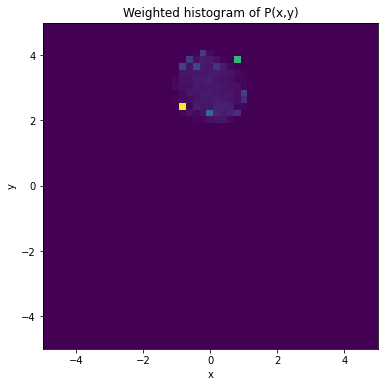

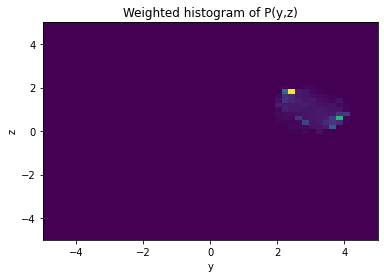

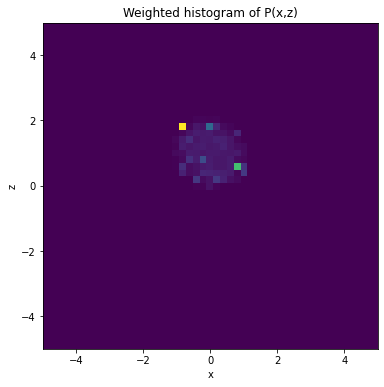

With weights:
Mean of x is -0.015867817673386485
Mean of y is 4.192239407199711
Mean of z is 1.4638786751337165


The covariance matrix is
[[ 0.49230709  0.04951005 -0.19381264]
 [ 0.04951005  2.38265717  0.35969108]
 [-0.19381264  0.35969108  0.67751239]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the known quantities
mu = np.array([0, 3, 1])
C = np.array([[0.8, 0.5, 0.6], [0.5, 0.9, 0.3], [0.6, 0.3, 0.8]])

# Defining the pdfs

def P(x,y,z):
  j = []
  for i in range(10**6):
    k = (((2*np.pi)**-1.5)* ((np.linalg.det(C))**-0.5)) * (np.exp(-0.5 * ((np.transpose((x[i],y[i],z[i]) - mu)@(C**-1)) @((x[i],y[i],z[i]) - mu))))
    j.append(k)
  return j
mu_x, mu_y, mu_z = 0, 3, 1
sigma = 0.23
def Q_x(x):
  return 1/(np.sqrt(2*np.pi*sigma**2)) * (np.exp(-0.5*((x-mu_x)**2/sigma**2)))
def Q_y(y):
  return 1/(np.sqrt(2*np.pi*sigma**2)) * (np.exp(-0.5*((y-mu_y)**2/sigma**2)))
def Q_z(z):
  return 1/(np.sqrt(2*np.pi*sigma**2)) * (np.exp(-0.5*((z-mu_z)**2/sigma**2)))

# Sampling x,y,z
num = 10**6
x_samples = np.random.normal(mu_x,sigma,num)
y_samples = np.random.normal(mu_y,sigma,num)
z_samples = np.random.normal(mu_z,sigma,num)

# Calculate weights
w = (P(x_samples,y_samples,z_samples)) / (Q_x(x_samples) * Q_y(y_samples) * Q_z(z_samples))
print('The mean value of the weights is', np.mean(w))
print('\n')

# Weighted histogram
bins = [np.linspace(-5,5), np.linspace(-5,5)]
plt.figure(figsize=(6,6))
plt.hist2d(x_samples,y_samples,bins=bins,weights=w)
plt.title('Weighted histogram of P(x,y)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.hist2d(y_samples,z_samples, bins = bins , weights=w)
plt.title('Weighted histogram of P(y,z)')
plt.xlabel('y')
plt.ylabel('z')
plt.show

plt.figure(figsize=(6,6))
plt.hist2d(x_samples,z_samples,bins=bins,weights=w)
plt.title('Weighted histogram of P(x,z)')
plt.xlabel('x')
plt.ylabel('z')
plt.show()

# Calculating Means 
def mean(x,weights=None):
    
    if weights is not None:
        return np.mean(weights*x)
    else:
        return np.mean(x)

print('With weights:')
print('Mean of x is', mean(x_samples,weights=w))
print('Mean of y is', mean(y_samples,weights=w))
print('Mean of z is', mean(z_samples,weights=w))

# Determining covariance matrix 
def cov_matrix(x,y,z,weights=None):
    
    if weights is not None:
        x_mean = np.mean(weights*x)
        y_mean = np.mean(weights*y)
        z_mean = np.mean(weights*z)   
        # Calculate each entry as a function
        C_xx = np.mean(weights*(x-x_mean)**2)
        C_yy = np.mean(weights*(y-y_mean)**2)
        C_xy = np.mean(weights*(x-x_mean)*(y-y_mean))
        C_zz = np.mean(weights*(z-z_mean)**2)
        C_zy = np.mean(weights*(z-z_mean)*(y-y_mean))
        C_zx = np.mean(weights* (z-z_mean)*(x-x_mean))
        
        return np.array([[C_xx,C_xy, C_zx],[C_xy,C_yy, C_zy], [C_zx,C_zy,C_zz]])
    
    else:
        # Use built-in numpy function
        return np.cov(x,y,z)
print('\n')
print('The covariance matrix is')
print(cov_matrix(x_samples,y_samples,z_samples,weights=w))



## <font color=#46769B>Part (b)</font>

The task here is to repeat part (a) using the built-in function `numpy.random.multivariate_normal`. See [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html).

Complete the following steps:
- Generate samples for $x$, $y$, $z$ by sampling from $P$ directly.
- Repeat the steps in part (a), calculating the means $\langle x \rangle$, $\langle y \rangle$ and the covariance $C$.
- Generate the same set of plots using `plt.hist2d`

### <font color=#46769B>Hint</font>

Your output from `numpy.random.multivariate_normal` will be an $N \times 3$-dimensional array, 
$$ \left( \begin{array}{ccc} x_0 & y_0 & z_0 \\ \vdots & \vdots & \vdots \\x_{N-1} & y_{N-1} & z_{N-1} \end{array} \right) \, .$$
That is, it is a matrix and let's call it `output`. 

You can get the $(i,j)$ element as `output[i,j]`. To get *all* $x$ samples, for example, you want *all* the $i$ values for $j=0$. The syntax is 
```py
x = output[:,0]
```
The `:` represents all values of the first index. This is known as [numpy array slicing](https://www.w3schools.com/python/numpy/numpy_array_slicing.asp).

[[-0.65972974  2.79690744 -0.42604411]
 [ 0.18207496  3.84407924  1.6030105 ]
 [-2.21970586  1.64058042 -1.56024818]]


[-0.65972974  0.18207496 -2.21970586]


[2.79690744 3.84407924 1.64058042]


[-0.42604411  1.6030105  -1.56024818]


With weights:
Mean of x is -0.8991202142879153
Mean of y is 2.760522366673064
Mean of z is -0.12776059587460634


The covariance matrix is
[[0.99007908 0.88640865 1.23053922]
 [0.88640865 0.80989645 1.1562796 ]
 [1.23053922 1.1562796  1.71218744]]


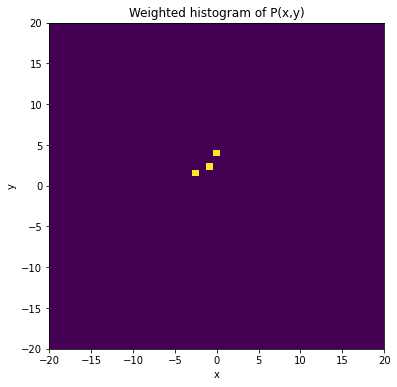

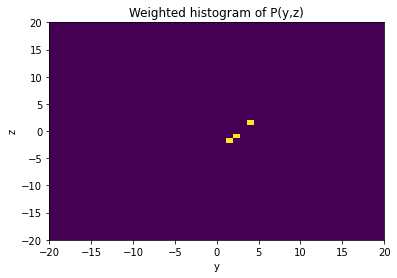

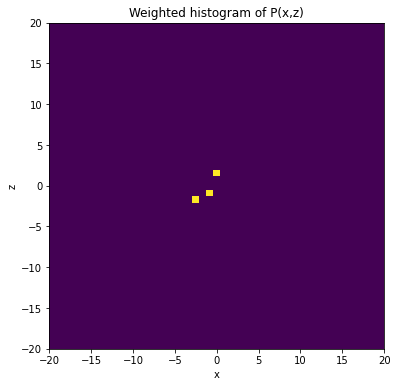

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

output = np.random.multivariate_normal([0,3,1], ([0.8,0.5,0.6], [0.5,0.9,0.3], [0.6,0.3,0.8]), (3))
print(output)
print('\n')
x_samples2 = output[:, 0]
print(x_samples2)
print('\n')
y_samples2 = output[:,1]
print(y_samples2)
print('\n')
z_samples2 = output[:,2]
print(z_samples2)
print('\n')

# Finding means 
print('With weights:')
print('Mean of x is', np.mean(x_samples2))
print('Mean of y is', np.mean(y_samples2))
print('Mean of z is', np.mean(z_samples2)) 

# Covariance Matrix 
def cov_matrix2(x,y,z):
  C_xx2 = np.mean((x-np.mean(x_samples2))**2)
  C_yy2 = np.mean((y-np.mean(y_samples2))**2)
  C_xy2 = np.mean((x-np.mean(x_samples2))*(y-np.mean(y_samples2)))
  C_zz2 = np.mean((z-np.mean(z_samples2))*(z-np.mean(z_samples2)))
  C_zy2 = np.mean((z-np.mean(z_samples2))*(y-np.mean(y_samples2)))
  C_zx2 = np.mean((z-np.mean(z_samples2))*(x-np.mean(x_samples2)))

  return np.array([[C_xx2,C_xy2, C_zx2],[C_xy2,C_yy2, C_zy2], [C_zx2,C_zy2,C_zz2]])

print('\n')
print('The covariance matrix is')
print(cov_matrix2(x_samples2,y_samples2,z_samples2))


# Plotting 
bins = [np.linspace(-20,20), np.linspace(-20,20)]
plt.figure(figsize=(6,6))
plt.hist2d(x_samples2,y_samples2,bins=bins)
plt.title('Weighted histogram of P(x,y)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.hist2d(y_samples2,z_samples2, bins = bins)
plt.title('Weighted histogram of P(y,z)')
plt.xlabel('y')
plt.ylabel('z')
plt.show

plt.figure(figsize=(6,6))
plt.hist2d(x_samples2,z_samples2,bins=bins)
plt.title('Weighted histogram of P(x,z)')
plt.xlabel('x')
plt.ylabel('z')
plt.show()